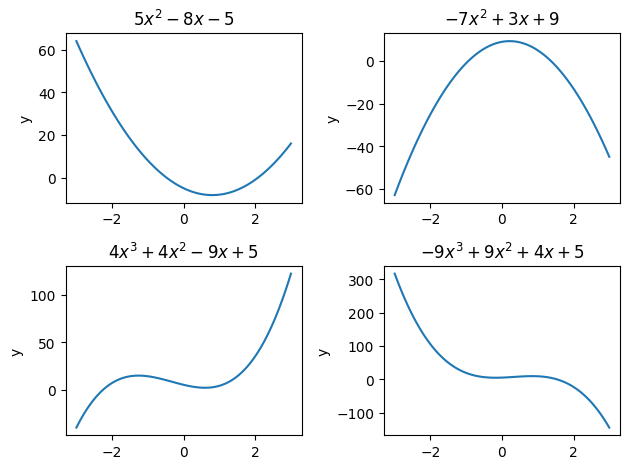

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Drawing polynomials on a grid:
x = np.linspace(-3, 3, 100)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, 5*x**2 - 8*x - 5)
axs[0, 0].set_ylabel("y")
axs[0, 0].set_title(r'$5x^2 - 8x - 5$')

axs[0, 1].plot(x, -7*x**2 + 3*x + 9)
axs[0, 1].set_ylabel("y")
axs[0, 1].set_title(r'$-7x^2 + 3x + 9$')

axs[1, 0].plot(x, 4*x**3 + 4*x**2 - 9*x + 5)
axs[1, 0].set_ylabel("y")
axs[1, 0].set_title(r'$4x^3 + 4x^2 - 9x + 5$')

axs[1, 1].plot(x, -9*x**3 + 9*x**2 + 4*x + 5)
axs[1, 1].set_ylabel("y")
axs[1, 1].set_title(r'$-9x^3 + 9x^2 + 4x + 5$')

plt.tight_layout()
plt.show()

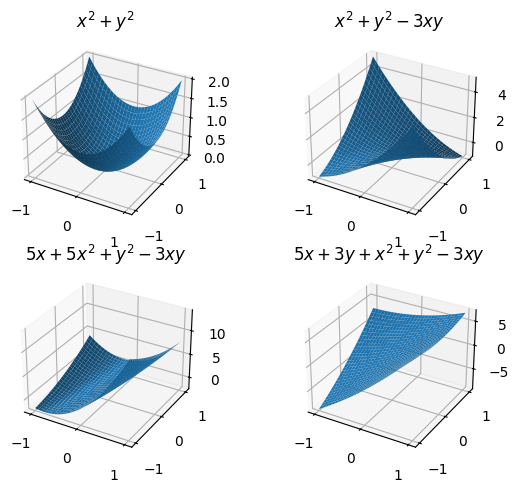

In [ ]:
# Response surface plots:
def f1(x, y):
    return x**2 + y**2

def f2(x, y):
    return x**2 + y**2 - 3*x*y

def f3(x, y):
    return 5*x + 5*x**2 + y**2 - 3*x*y

def f4(x, y):
    return 5*x + 3*y + x**2 + y**2 - 3*x*y

# Simulate the variables 2-D grid
x = y = np.linspace(-1, 1, 30)
X, Y = np.meshgrid(x, y)
z1 = f1(X, Y)
z2 = f2(X, Y)
z3 = f3(X, Y)
z4 = f4(X, Y)

# plot the 3D surface
fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X, Y, z1)
ax1.set_title(r'$x^2 + y^2$')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X, Y, z2)
ax2.set_title(r'$x^2 + y^2 - 3xy$')

ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X, Y, z3)
ax3.set_title(r'$5x + 5x^2 + y^2 - 3xy$')

ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X, Y, z4)
ax4.set_title(r'$5x + 3y + x^2 + y^2 - 3xy$')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


from google.colab import files
uploaded = files.upload()

# Load data
data = pd.read_csv("12-boston_housing.csv")
print(data.head())
#

Boston = data

In [14]:
# Split the data into training and test set
np.random.seed(123)
train_data, test_data = train_test_split(Boston, test_size=0.2)

# Build the model on the training data
X_train = sm.add_constant(np.column_stack((train_data['LSTAT'], train_data['LSTAT']**2)))
y_train = train_data['MEDV']
reg2 = sm.OLS(y_train, X_train).fit()

# Make predictions on the test data
X_test = sm.add_constant(np.column_stack((test_data['LSTAT'], test_data['LSTAT']**2)))
predictions = reg2.predict(X_test)

# Model performance
model_performance = {
    'RMSE': np.sqrt(mean_squared_error(test_data['MEDV'], predictions)),
    'R2': r2_score(test_data['MEDV'], predictions)
}

print(reg2.summary())
print(model_performance)



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     375.2
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.44e-92
Time:                        16:50:52   Log-Likelihood:                -1256.9
No. Observations:                 404   AIC:                             2520.
Df Residuals:                     401   BIC:                             2532.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3266      0.992     43.660      0.0

In [13]:
# 5th degree polynomial regression
X_train_5 = sm.add_constant(np.column_stack([train_data['LSTAT']**i for i in range(6)]))
reg5 = sm.OLS(y_train, X_train_5).fit()

# Make predictions
X_test_5 = sm.add_constant(np.column_stack([test_data['LSTAT']**i for i in range(6)]))
predictions_5 = reg5.predict(X_test_5)

# Model performance
model_performance_5 = {
    'RMSE': np.sqrt(mean_squared_error(test_data['MEDV'], predictions_5)),
    'R2': r2_score(test_data['MEDV'], predictions_5)
}

print(model_performance_5)

{'RMSE': 5.57600755944667, 'R2': 0.6242028597777759}


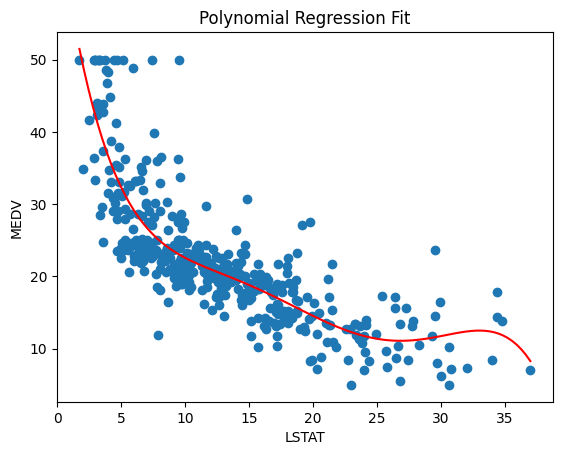

In [16]:
# Plotting
plt.scatter(train_data['LSTAT'], train_data['MEDV'])
x = np.linspace(train_data['LSTAT'].min(), train_data['LSTAT'].max(), 100)
y = reg5.predict(sm.add_constant(np.column_stack([x**i for i in range(6)])))
plt.plot(x, y, color='red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Polynomial Regression Fit')
plt.show()

In [17]:
# ANOVA
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(reg2, reg5)
print(anova_results)

   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0     401.0  11920.995563      0.0          NaN        NaN           NaN
1     398.0  10484.477600      3.0  1436.517964  18.177162  4.503355e-11


In [25]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

# Load data
# Load the data
salaries = pd.read_csv('12-Salaries.csv')  # Replace with actual path to the Salaries dataset
salaries = salaries.rename(columns={"yrs.service": "yrs"})
# Inspect the data
print(salaries.sample(3))

# If the categorical variable is not a category, you need to convert it first.
salaries['sex'] = salaries['sex'].astype('category')

Saving 12-Salaries.csv to 12-Salaries (3).csv
         rank discipline  yrs.since.phd  yrs     sex  salary
254      Prof          A             28    7  Female  116450
311      Prof          A             14    9    Male  108100
272  AsstProf          A              4    1    Male   73000


In [19]:
# Compute the model
model = smf.ols('salary ~ sex', data=salaries).fit()
print(model.summary())

# Fitted function:
# Yhat = 101002.41 + 14088.01 * sex

# The average salary for female is estimated to be 101002,
# whereas males are estimated a total of 101002 + 14088 = 115090.
# The p-value for the dummy variable sexMale is very significant, suggesting that
# there is statistical evidence of a difference in average salary between the genders.

# The contrasts function equivalent in Python
print(pd.get_dummies(salaries['sex'], drop_first=True).head())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.738
Date:                Mon, 24 Feb 2025   Prob (F-statistic):            0.00567
Time:                        16:57:43   Log-Likelihood:                -4655.4
No. Observations:                 397   AIC:                             9315.
Df Residuals:                     395   BIC:                             9323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.01e+05   4809.386     21.001      

In [26]:
# Adding a numerical predictor
model2 = smf.ols('salary ~ yrs + sex', data=salaries).fit()
print(model2.summary())

# Now with interaction:
model3 = smf.ols('salary ~ yrs * sex', data=salaries).fit()
print(model3.summary())
# Rule: when using interaction term always include the individual terms as well

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     26.82
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.20e-11
Time:                        17:05:31   Log-Likelihood:                -4633.9
No. Observations:                 397   AIC:                             9274.
Df Residuals:                     394   BIC:                             9286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.236e+04   4740.188     19.484      

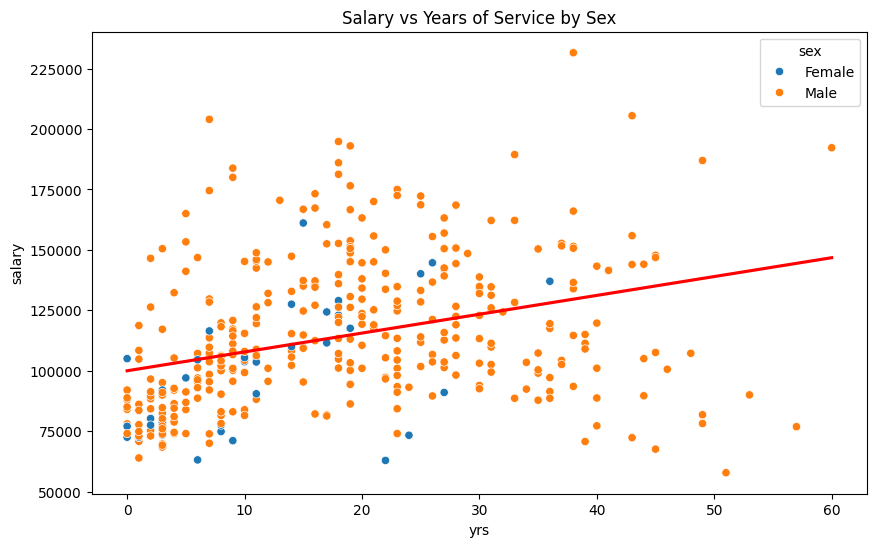

In [28]:
# Plot:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salaries, x='yrs', y='salary', hue='sex')
sns.regplot(data=salaries, x='yrs', y='salary', scatter=False, ci=None, line_kws={'color': 'red'})
plt.title('Salary vs Years of Service by Sex')
plt.show()

# Exercise: Write down the two separate regression equations from the interaction model
# Female: y =
# Male: y =


In [ ]:
# rowtime data to be added
# need to find Python version of regsubsets and bestglm